# SMOTE (Données numériques)

In [3]:
!pip install -U matplotlib
!pip install imblearn

You should consider upgrading via the 'C:\Users\rmrsm\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\rmrsm\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# librairies générales
import pickle 
import string
import time
import base64
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE

# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns


# librairies scikit learn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score

## Les 3 fonctions :
1- suppression d'un nombre de données *cut_from_versicolor*

2- réequilibrage du dataframe selon versicolor *generate_versicolor*

3- réequilibrage mais ne renvoyant que les données générées *generate_and_get_versicolor*

In [5]:
#count : la quantité qu'on veut supprimer
#df : les données Iris d'origine

def cut_from_versicolor(count, df):
  group = df.groupby('species')
  versicolor = group.get_group('versicolor')
  others = pd.concat([group.get_group('virginica'), group.get_group('setosa')])
  versicolor = versicolor.sample(50-count)
    
  return pd.concat([others, versicolor])

In [6]:
#cutdf : les données d'iris avec moins de données Versicolor
#kneighbors : le nombre de voisins que SMOTE doit prendre en compte pour 1 générer une donnée.

def generate_versicolor(cutdf, kneighbors):
    
  #extraction des versicolor
  group = cutdf.groupby('species')
    
  #versicolor contient les exemples de versicolor dans cutdf
  versicolor = group.get_group('versicolor')
    
  #others contient les exemples des autres espèces
  others = pd.concat([group.get_group('virginica'), group.get_group('setosa')])

  smote = SMOTE(k_neighbors = kneighbors)

  # Conversion du dataframe
  array = cutdf.values #necessité de convertir le dataframe en numpy

  #X : représentant les caractéristiques d'une donnée
  X = array[:,0:4] 
  #y vecteur : représentant la variable à prédire
  y = array[:,4]

  #SMOTE détecte automatiquement combien de données il faut générer
  Xres, yres = smote.fit_resample(X,y)

  #On créé un y_final avec les données de yres pour avoir le bon type de donnée pour les les variables à prédire
  y_final = np.zeros((yres.size, 1), dtype = np.dtype('U100'))
  i= 0
  for element in yres:
    buffer = [element]
    y_final[i,:]= buffer
    i= i+1
    
  #j'ai arrondi les valeurs de SMOTE à un chiffre après la virgule pour que les données soient ressemblantes à celles d'origines
  Xres = np.around(Xres, decimals = 1)
    
  #Création du nouveau dataframe 
  donnees_generees = np.append(Xres, y_final, axis = 1)
  names = cutdf.columns

  newdf = pd.DataFrame(donnees_generees,columns = names)
  group = newdf.groupby('species')
  versicolor = group.get_group('versicolor')

  #transformation des valeurs string en float 
  versicolor = versicolor.astype({'petal_length' :'float'})
  versicolor = versicolor.astype({'sepal_width':'float'})
  versicolor = versicolor.astype({'sepal_length':'float'})
  versicolor = versicolor.astype({'petal_width':'float'})

  #On concatène versicolor et les deux autres après avoir ajouté des exemples à versicolor.
  newdf = pd.concat([versicolor, others]).reset_index().drop('index', axis=1)
  
  if len(newdf)!=150:
    print("****Final length is not 150 !****")
    
  return newdf

In [7]:
#cutdf : les données d'iris avec moins de données Versicolor
#kneighbors : le nombre de voisins que SMOTE doit prendre en compte pour 1 générer une donnée.

def generate_and_get_versicolor(cutdf, kneighbors):
    
  #extraction des versicolor
  group = cutdf.groupby('species')
  versicolor = group.get_group('versicolor')
  others = pd.concat([group.get_group('virginica'), group.get_group('setosa')])

  #Génération des nouvelles données pour équilibrer les classes 
  newdf = generate_versicolor(cutdf, kneighbors)
  group = newdf.groupby('species')
  versicolor_new = group.get_group('versicolor')

  debut = len(versicolor)
  fin = len(versicolor_new)-1
    
  return versicolor_new.loc[debut:fin]

## Extraction des données :

In [8]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Observation des données générees par SMOTE 

On va supprimer 45 données, les regénérer. Enfin seulement regarder ces 45 données sur un plot

In [9]:
count_generate = 45 #combien d'occurences on veut enlever
cut = cut_from_versicolor(count_generate, df)
cut['species'].value_counts()

virginica     50
setosa        50
versicolor     5
Name: species, dtype: int64

MANON MODIFICATION :


Scratter plot du nouveau dataframe : 



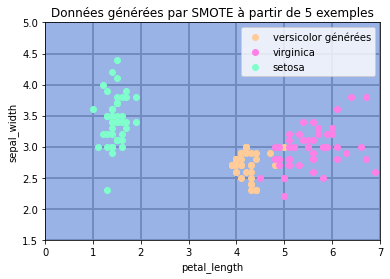

In [10]:
kneighbors = 4 #par défaut il est à 5 mais on est obligé de le baisser car il n'y a que 6 données (voir partie 2.2.2 du rendu)
newdf = generate_versicolor(cut, kneighbors)
newdf['species'].value_counts()

#creation du plot 
print("\nScratter plot du nouveau dataframe : \n")

plt.rc('axes', axisbelow=True)
plt.figure()
plt.axes().set(facecolor=(.6,.7,.9,1.))
plt.xlim(0.,7.)
plt.xlabel('petal_length')
plt.ylim(1.5, 5.)
plt.ylabel('sepal_width')
plt_title = 'Données générées par SMOTE à partir de '+str(50-count_generate)+' exemples'
plt.title(plt_title)
plt.grid(axis="both", linewidth=2, color=(.45,.55,.75,1.))

#versicolor
versicolor = newdf.loc[newdf['species']=='versicolor']
plt.scatter(versicolor['petal_length'].values, versicolor['sepal_width'].values, color=(1.,0.8,.6,1.), label = "versicolor générées")

#virginica
virginica = newdf.loc[newdf['species']=='virginica']
plt.scatter(virginica['petal_length'].values, virginica['sepal_width'].values, color=(1.,0.5,.9,1.), label="virginica")

#setosa
setosa = newdf.loc[newdf['species']=='setosa']
plt.scatter(setosa['petal_length'].values, setosa['sepal_width'].values, color=(.5,1.,.8,1.), label="setosa")

plt.legend(loc= "upper right")
plt.show()

## Evaluation dans la prédiction :
-  Tout d'abord entrainer un LR (LogisticRegression) sur df
-  Générer de nouvelles données et tester LR dessus à chaque fois sans le réentrainer

-  Pour la prédiction on évalue juste sur les données Versicolor générées.

In [11]:
Xdf = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
ydf = df['species']

clf=LogisticRegression(max_iter = 200)#default max_iter = 100
clf.fit(Xdf, ydf)

LogisticRegression(max_iter=200)

On fait varier le nombre de suppressions de 2 à 44 avec un step de 4.

Pour chaque nombre de suppressions, on répète le cycle suppression-génération-prédiction 5 fois et on fait la moyenne des résultats.

In [12]:
accuracy=[]
precision=[]
recall=[]
counts = []

for count in np.arange(1,45,4):
    
  print("\n**Suppression de ",count," données**")
  accuracies = []
  precisions = []
  recalls = []
    
  #cycle suppression-génération-prédiction
  for i in range(5):
    
    cut = cut_from_versicolor(count, df)
    gen = generate_and_get_versicolor(cut, kneighbors)
    print("\n\tGénération de ",len(gen)," données\n")

    Xgen = gen[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    ygen = gen['species']
    print("\n\tygen : ",ygen.value_counts())

    pred = clf.predict(Xgen)
    
    rep = classification_report(ygen, pred, output_dict=True)
    accuracies.append(rep['accuracy'])
    precisions.append(rep['versicolor']['precision'])
    recalls.append(rep['versicolor']['recall'])

  #moyenne des 5 cycles 
  accuracy.append(np.mean(accuracies))
  precision.append(np.mean(precisions))
  recall.append(np.mean(recalls))
  counts.append(count)

results = pd.DataFrame()
results['nombre de données supprimées puis générées']=[count for count in counts]
results['exactitude']=accuracy
results['rappel']=recall
results['precision']=precision


**Suppression de  1  données**

	Génération de  1  données


	ygen :  versicolor    1
Name: species, dtype: int64

	Génération de  1  données


	ygen :  versicolor    1
Name: species, dtype: int64

	Génération de  1  données


	ygen :  versicolor    1
Name: species, dtype: int64

	Génération de  1  données


	ygen :  versicolor    1
Name: species, dtype: int64

	Génération de  1  données


	ygen :  versicolor    1
Name: species, dtype: int64

**Suppression de  5  données**

	Génération de  5  données


	ygen :  versicolor    5
Name: species, dtype: int64

	Génération de  5  données


	ygen :  versicolor    5
Name: species, dtype: int64

	Génération de  5  données


	ygen :  versicolor    5
Name: species, dtype: int64

	Génération de  5  données


	ygen :  versicolor    5
Name: species, dtype: int64

	Génération de  5  données


	ygen :  versicolor    5
Name: species, dtype: int64

**Suppression de  9  données**

	Génération de  9  données


	ygen :  versicolor    9
Name: species, dtyp

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

 versicolor    13
Name: species, dtype: int64

**Suppression de  17  données**

	Génération de  17  données


	ygen :  versicolor    17
Name: species, dtype: int64

	Génération de  17  données


	ygen :  versicolor    17
Name: species, dtype: int64

	Génération de  17  données


	ygen :  versicolor    17
Name: species, dtype: int64

	Génération de  17  données


	ygen :  versicolor    17
Name: species, dtype: int64

	Génération de  17  données


	ygen :  versicolor    17
Name: species, dtype: int64

**Suppression de  21  données**

	Génération de  21  données


	ygen :  versicolor    21
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


	Génération de  21  données


	ygen :  versicolor    21
Name: species, dtype: int64

	Génération de  21  données


	ygen :  versicolor    21
Name: species, dtype: int64

	Génération de  21  données


	ygen :  versicolor    21
Name: species, dtype: int64

	Génération de  21  données


	ygen :  versicolor    21
Name: species, dtype: int64

**Suppression de  25  données**

	Génération de  25  données


	ygen :  versicolor    25
Name: species, dtype: int64

	Génération de  25  données


	ygen :  versicolor    25
Name: species, dtype: int64

	Génération de  25  données


	ygen :  versicolor    25
Name: species, dtype: int64

	Génération de  25  données


	ygen :  versicolor    25
Name: species, dtype: int64

	Génération de  25  données


	ygen :  versicolor    25
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


**Suppression de  29  données**

	Génération de  29  données


	ygen :  versicolor    29
Name: species, dtype: int64

	Génération de  29  données


	ygen :  versicolor    29
Name: species, dtype: int64

	Génération de  29  données


	ygen :  versicolor    29
Name: species, dtype: int64

	Génération de  29  données


	ygen :  versicolor    29
Name: species, dtype: int64

	Génération de  29  données


	ygen :  versicolor    29
Name: species, dtype: int64

**Suppression de  33  données**

	Génération de  33  données


	ygen :  versicolor    33
Name: species, dtype: int64

	Génération de  33  données


	ygen :  versicolor    33
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


	Génération de  33  données


	ygen :  versicolor    33
Name: species, dtype: int64

	Génération de  33  données


	ygen :  versicolor    33
Name: species, dtype: int64

	Génération de  33  données


	ygen :  versicolor    33
Name: species, dtype: int64

**Suppression de  37  données**

	Génération de  37  données


	ygen :  versicolor    37
Name: species, dtype: int64

	Génération de  37  données


	ygen :  versicolor    37
Name: species, dtype: int64

	Génération de  37  données


	ygen :  versicolor    37
Name: species, dtype: int64

	Génération de  37  données


	ygen :  versicolor    37
Name: species, dtype: int64

	Génération de  37  données


	ygen :  versicolor    37
Name: species, dtype: int64

**Suppression de  41  données**

	Génération de  41  données


	ygen :  versicolor    41
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


	Génération de  41  données


	ygen :  versicolor    41
Name: species, dtype: int64

	Génération de  41  données


	ygen :  versicolor    41
Name: species, dtype: int64

	Génération de  41  données


	ygen :  versicolor    41
Name: species, dtype: int64

	Génération de  41  données


	ygen :  versicolor    41
Name: species, dtype: int64


In [13]:
results.head(10)

,nombre de données supprimées puis générées,exactitude,rappel,precision
0,1,1.000000,1.000000,1.0
1,5,1.000000,1.000000,1.0
2,9,1.000000,1.000000,1.0
3,13,0.969231,0.969231,1.0
4,17,0.952941,0.952941,1.0
5,21,0.980952,0.980952,1.0
6,25,0.984000,0.984000,1.0
7,29,0.965517,0.965517,1.0
8,33,0.987879,0.987879,1.0
9,37,0.935135,0.935135,1.0


En faire un plot :
(On ne plot que l'exactitude car la précision sera à 100% et le rappel égal à l'exactitude comme on n'a que des versicolor dans y_true)

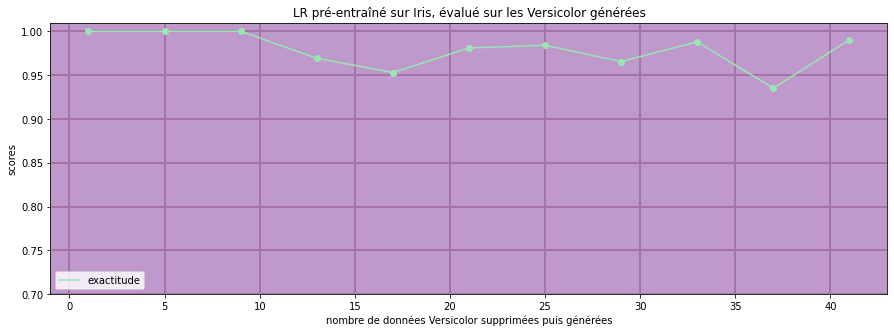

In [14]:
plt.figure(figsize=(15,5))
plt.axes().set(facecolor=(.75,.6,.8,1.))
plt.plot(results['nombre de données supprimées puis générées'], results['exactitude'], color=(.6,.9,.7,1.),label='exactitude')
plt.plot(results['nombre de données supprimées puis générées'], results['exactitude'],'o', color=(.6,.9,.7,1.))


plt.legend()
plt.xlabel("nombre de données Versicolor supprimées puis générées")
plt.ylabel("scores")
plt.ylim(0.7,1.01)
plt.grid(axis="both", linewidth=2, color=(.65,.45,.65,1.))
plt.title("LR pré-entraîné sur Iris, évalué sur les Versicolor générées")

plt.show()

## Evaluation dans l'apprentissage

-   On fait la même boucle sauf que cette fois-ci on ré-entraine LR à chaque fois sur les données générées.
-   Le second changement est qu'on teste sur les données d'origine.
-   On fait d'abord une expérimentation en testant juste sur Versicolor, puis on en fait une seconde en testant sur les deux autres classes.

### Première expérimentation :

In [15]:
#Récupération des Versicolor
vers = df.loc[df['species']=='versicolor']
XdfVersicolor = vers[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
ydfVersicolor = vers['species']

In [16]:
accuracy=[]
precision=[]
recall=[]
counts = []

for count in np.arange(1,43,4):
    
  print("\nSuppression de ",count," données\n")
  accuracies = []
  precisions = []
  recalls = []
    
  #cycle suppression-génération-prédiction
  for i in range(5):
        
    clf = LogisticRegression(max_iter = 200)

    cut = cut_from_versicolor(count, df)
    gen = generate_versicolor(cut, kneighbors)
    print("génération de ",len(gen)," données")

    Xgen = gen[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    ygen = gen['species']
    print(ygen.value_counts())
    clf.fit(Xgen,ygen)

    pred = clf.predict(XdfVersicolor)
    
    rep = classification_report(ydfVersicolor, pred, output_dict=True)
    accuracies.append(rep['accuracy'])
    precisions.append(rep['versicolor']['precision'])
    recalls.append(rep['versicolor']['recall'])

  #moyennes des 5 cycles
  accuracy.append(np.mean(accuracies))
  precision.append(np.mean(precisions))
  recall.append(np.mean(recalls))
  counts.append(count)

results = pd.DataFrame()
results['nombre de données supprimées puis générées']=[count for count in counts]
results['exactitude']=accuracy
results['rappel']=recall
results['precision']=precision


Suppression de  1  données

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


Suppression de  5  données

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  9  données

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  13  données

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  17  données

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  21  données

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  25  données

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


Suppression de  29  données

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  33  données

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  37  données

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  41  données

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

In [17]:
results.head(10)

,nombre de données supprimées puis générées,exactitude,rappel,precision
0,1,0.940,0.940,1.0
1,5,0.940,0.940,1.0
2,9,0.940,0.940,1.0
3,13,0.944,0.944,1.0
4,17,0.944,0.944,1.0
5,21,0.948,0.948,1.0
6,25,0.940,0.940,1.0
7,29,0.956,0.956,1.0
8,33,0.952,0.952,1.0
9,37,0.944,0.944,1.0


En faire un plot :

(on ne plot que l'exactitude car comme y_true ne contient qu'une seule classe, le rappel sera égal à l'exactitude et la précision sera à 100% si on regarde juste sur Versicolor)

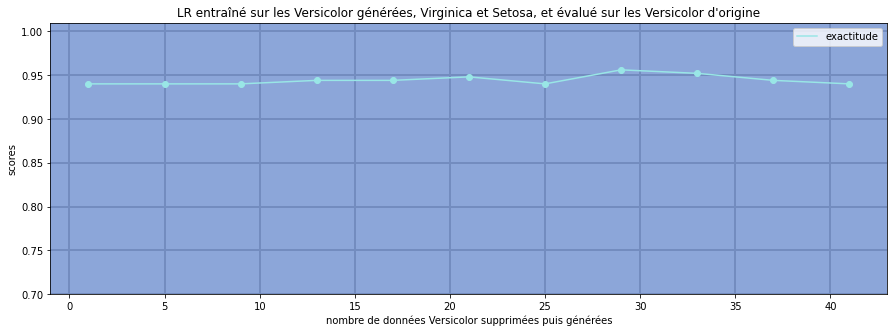

In [18]:
plt.figure(figsize=(15,5))
plt.axes().set(facecolor=(.55,.65,.85,1.))

plt.plot(results['nombre de données supprimées puis générées'], results['exactitude'], color=(.6,.9,.9,1.),label='exactitude')
plt.plot(results['nombre de données supprimées puis générées'], results['exactitude'],'o', color=(.6,.9,.9,1.))

plt.legend()
plt.xlabel("nombre de données Versicolor supprimées puis générées")
plt.ylabel("scores")
plt.ylim(0.7,1.01)
plt.grid(axis="both", linewidth=2, color=(.45,.55,.75,1.))
plt.title("LR entraîné sur les Versicolor générées, Virginica et Setosa, et évalué sur les Versicolor d'origine")

plt.show()

### Seconde expérimentation : vérifier que les scores sur les autres classes ne sont pas affectés

In [19]:
#on sépare les classes Virginica et Setosa de Versicolor
group = df.groupby('species')
others = pd.concat([group.get_group('virginica'), group.get_group('setosa')])
XdfOthers = others[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
ydfOthers = others['species']

In [20]:
accuracy=[]
precision=[]
recall=[]
counts = []

for count in np.arange(1,43,4):
    
  print("\nSuppression de ",count," données")
  accuracies = []
  precisions = []
  recalls = []
    
  #cycle suppression-génération-prédiction
  for i in range(5):
    clf = LogisticRegression(max_iter = 200)

    cut = cut_from_versicolor(count, df)
    gen = generate_versicolor(cut, kneighbors)
    print("génération de ",len(gen)," données")

    Xgen = gen[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    ygen = gen['species']
    print(ygen.value_counts())
    clf.fit(Xgen,ygen)


    pred = clf.predict(XdfOthers)
    
    rep = classification_report(ydfOthers, pred, output_dict=True)
    accuracies.append(rep['accuracy'])
    precisions.append( (rep['setosa']['precision']+rep['virginica']['precision'])/2.)
    recalls.append( (rep['setosa']['recall']+rep['virginica']['recall'])/2.)

  #moyennes des 5 cycles 
  accuracy.append(np.mean(accuracies))
  precision.append(np.mean(precisions))
  recall.append(np.mean(recalls))
  counts.append(count)
    
results = pd.DataFrame()
results['nombre de données supprimées puis générées']=[count for count in counts]
results['exactitude']=accuracy
results['rappel']=recall
results['precision']=precision


Suppression de  1  données
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1



Suppression de  5  données
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  9  données
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  13  données
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  17  données
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: s

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  21  données
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  25  données
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  29  données
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  33  données
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  37  données
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Suppression de  41  données
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ici aussi on a la même chose sur la précision et le recall car on ne confond jamais Setosa avec Virginica, seulement avec Versicolor. Versicolor est visuellement entre Setosa et Virginica.

Ainsi les seules erreurs sont des Versicolors, ainsi chaque prédiction est juste (prec=100).
De plus le rappel est égal à l'exactitude car le nombre de vrais positifs est égal au total de bonnes prédictions et le total des faux négatifs est égal au nombre de mal classés

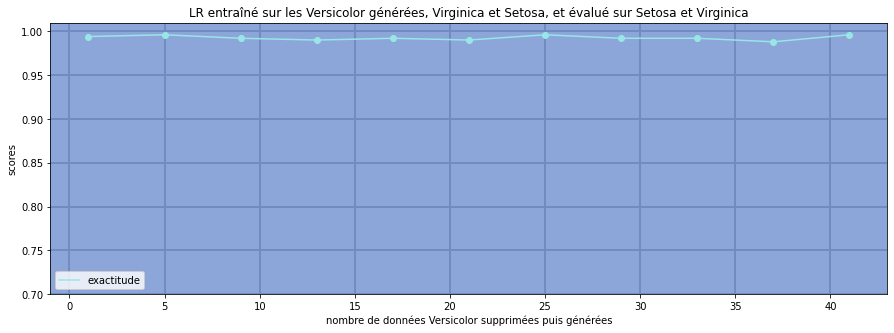

In [21]:
plt.figure(figsize=(15,5))
plt.axes().set(facecolor=(.55,.65,.85,1.))

plt.plot(results['nombre de données supprimées puis générées'], results['exactitude'], color=(.6,.9,.9,1.),label='exactitude')
plt.plot(results['nombre de données supprimées puis générées'], results['exactitude'],'o', color=(.6,.9,.9,1.))

plt.legend()
plt.xlabel("nombre de données Versicolor supprimées puis générées")
plt.ylabel("scores")
plt.ylim(0.7,1.01)
plt.grid(axis="both", linewidth=2, color=(.45,.55,.75,1.))
plt.title("LR entraîné sur les Versicolor générées, Virginica et Setosa, et évalué sur Setosa et Virginica")

plt.show()

### Etude du paramètres k_neighbors sur la génération des données 

k_neighbors est un paramètre de SMOTE renseignant le nombre des plus proches voisins que doit prendre SMOTE pour générer une nouvelle donnée.

Nous allons donc faire évoluer le nombre de k_neighbors pour un nombre de données à générer fixé.

Pour un k_neighbors = 5 on pouvait aller jusqu'à un count = 44. 
Ca veut dire qu'on laissait 6 données pour que SMOTE en génère. Il faut donc minimum 1 donnée en plus que k_neighbors.

On pourra observer les résultats à travers un plot avec les résultats des données générées pour les Versicolor.

In [22]:
# df : données Iris d'origine
# count : nombre de données à supprimer et générer 
# versicolorTest : booléen pour savoir si on teste sur les classes Versicolor ou Virginica et Setosa 

def change_k_neighbors(df, count, versicolorTest):
    
    #on règle les paramètres pour que SMOTE puisse tourner correctement 

    #on impose un max_k_neighbors pour que SMOTE fonctionne 
    max_k_neighbors = 50-count #on ne met pas le -1 car ca n'inclus pas le max_k_neighbors
    #ex: Pour max_k_neighbors = 5 
    # On va faire 1 2 3 4 

    #en fonction de ce max_k_neighbors on change l'intervalle de celui-ci pour avoir assez de données 
    if max_k_neighbors < 10 : 
        gap = 1
    elif max_k_neighbors < 20 : 
        gap = 2 
    else : 
        gap = 4
        
    accuracy=[]
    precision=[]
    recall=[]
    k_neighbors_tab = []
    print("Suppression de ",count," données\n")
    
    #on choisi quelles données de test on veut 
    if versicolorTest == True :
        vers = df.loc[df['species']=='versicolor']
        XdfTest = vers[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
        ydfTest = vers['species']
    else : 
        group = df.groupby('species')
        others = pd.concat([group.get_group('virginica'), group.get_group('setosa')])
        XdfTest = others[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
        ydfTest = others['species']
    
    
    for i in np.arange(1,max_k_neighbors,gap):
        
      print("***k_neighbors : ",i,"***\n")
      accuracies = []
      precisions = []
      recalls = []
    
      #5 cycles 
      for j in range(5):
        clf = LogisticRegression(max_iter = 200)

        cut = cut_from_versicolor(count, df)
        gen = generate_versicolor(cut, i)
        print("Génération de ",len(gen)," données")

        Xgen = gen[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
        ygen = gen['species']
        print(ygen.value_counts())
        clf.fit(Xgen,ygen)

        
        pred = clf.predict(XdfTest)

        rep = classification_report(ydfTest, pred, output_dict=True)

        accuracies.append(rep['accuracy'])
        
        if versicolorTest == True : 
            precisions.append(rep['versicolor']['precision'])
            recalls.append(rep['versicolor']['recall'])
        else :
            precisions.append( (rep['setosa']['precision']+rep['virginica']['precision'])/2.)
            recalls.append( (rep['setosa']['recall']+rep['virginica']['recall'])/2.)

      #moyennes des 5 cycles 
      accuracy.append(np.mean(accuracies))
      precision.append(np.mean(precisions))
      recall.append(np.mean(recalls))
      k_neighbors_tab.append(i)
        
    results = pd.DataFrame()
    results['k_neighbors']=[k for k in k_neighbors_tab]
    results['exactitude']=accuracy
    results['rappel']=recall
    results['precision']=precision

    return results

#### Affichage des plot pour les deux tests 

- Versicolor 
- Virginica et Setosa 

Suppression de  15  données

***k_neighbors :  1 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

***k_neighbors :  5 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  9 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  13 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  17 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  21 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  25 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  29 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  33 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Suppression de  30  données

***k_neighbors :  1 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  5 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  9 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  13 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  17 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Suppression de  40  données

***k_neighbors :  1 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  3 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  5 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  7 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  9 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Suppression de  45  données

***k_neighbors :  1 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

***k_neighbors :  2 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

***k_neighbors :  3 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

***k_neighbors :  4 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


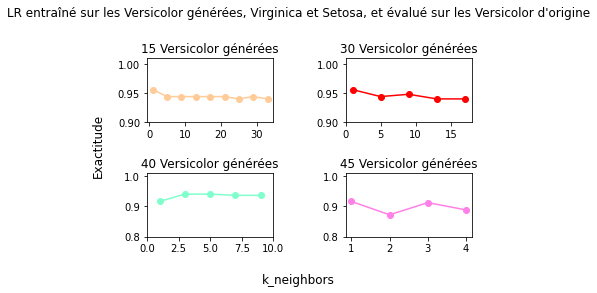

In [23]:
results15 = change_k_neighbors(df, 15, True)
results30 = change_k_neighbors(df, 30, True)
results40 = change_k_neighbors(df, 40, True)
results45 = change_k_neighbors(df, 45, True)

figure, axis = plt.subplots(2, 2)
figure.tight_layout(pad=3.5)
figure.subplots_adjust(top=0.8)
title = "LR entraîné sur les Versicolor générées, Virginica et Setosa, et évalué sur les Versicolor d'origine"
figure.suptitle(title)
figure.supxlabel("k_neighbors")
figure.supylabel("Exactitude")

# For Sine Function
axis[0, 0].plot(results15['k_neighbors'], results15['exactitude'], color=(1.,0.8,.6,1.),label='15')
axis[0, 0].plot(results15['k_neighbors'], results15['exactitude'],'o', color=(1.,0.8,.6,1.))
axis[0, 0].set_title("15 Versicolor générées")

# For Cosine Function
axis[0, 1].plot(results30['k_neighbors'], results30['exactitude'], color='red',label='30')
axis[0, 1].plot(results30['k_neighbors'], results30['exactitude'],'o', color='red')
axis[0, 1].set_title("30 Versicolor générées")

# For Tangent Function
axis[1, 0].plot(results40['k_neighbors'], results40['exactitude'], color=(.5,1.,.8,1.),label='40')
axis[1, 0].plot(results40['k_neighbors'], results40['exactitude'],'o', color=(.5,1.,.8,1.))
axis[1, 0].set_title("40 Versicolor générées")
  
# For Tanh Function
axis[1, 1].plot(results45['k_neighbors'], results45['exactitude'], color=(1.,0.5,.9,1.),label='45')
axis[1, 1].plot(results45['k_neighbors'], results45['exactitude'],'o', color=(1.,0.5,.9,1.))
axis[1, 1].set_title("45 Versicolor générées")

axis[0, 0].set_ylim([0.9,1.01])
axis[0, 1].set_ylim([0.9,1.01])
axis[1, 0].set_ylim([0.8,1.01])
axis[1, 1].set_ylim([0.8,1.01])


axis[0, 1].set_xlim([0,max(results30['k_neighbors'])+1])
axis[1, 0].set_xlim([0,max(results40['k_neighbors'])+1])

plt.show()


Suppression de  15  données

***k_neighbors :  1 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


***k_neighbors :  5 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  9 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  13 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species,

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  17 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  21 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  25 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  29 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  33 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Suppression de  30  données

***k_neighbors :  1 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  5 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  9 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  13 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  17 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Suppression de  40  données

***k_neighbors :  1 ***

Génération de  150  données
versicolor    50
virginica     50
se

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  3 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  5 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  7 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  9 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Suppression 

C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1


Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  2 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

***k_neighbors :  3 ***

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
***k_neighbors :  4 ***



C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Génération de  150  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmrsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

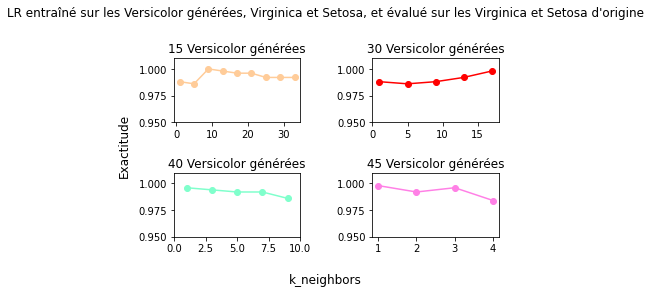

In [24]:
results15 = change_k_neighbors(df, 15, False)
results30 = change_k_neighbors(df, 30, False)
results40 = change_k_neighbors(df, 40, False)
results45 = change_k_neighbors(df, 45, False)

figure, axis = plt.subplots(2, 2)
figure.tight_layout(pad=3.5)
figure.subplots_adjust(top=0.8)
figure.supxlabel("k_neighbors")
figure.supylabel("Exactitude")
title = "LR entraîné sur les Versicolor générées, Virginica et Setosa, et évalué sur les Virginica et Setosa d'origine"
figure.suptitle(title)

axis[0, 0].plot(results15['k_neighbors'], results15['exactitude'], color=(1.,0.8,.6,1.),label='15')
axis[0, 0].plot(results15['k_neighbors'], results15['exactitude'],'o', color=(1.,0.8,.6,1.))
axis[0, 0].set_title("15 Versicolor générées")

axis[0, 1].plot(results30['k_neighbors'], results30['exactitude'], color="red",label='15')
axis[0, 1].plot(results30['k_neighbors'], results30['exactitude'],'o', color="red")
axis[0, 1].set_title("30 Versicolor générées")

axis[1, 0].plot(results40['k_neighbors'], results40['exactitude'], color=(.5,1.,.8,1.),label='15')
axis[1, 0].plot(results40['k_neighbors'], results40['exactitude'],'o', color=(.5,1.,.8,1.))
axis[1, 0].set_title("40 Versicolor générées")

axis[1, 1].plot(results45['k_neighbors'], results45['exactitude'], color=(1.,0.5,.9,1.),label='15')
axis[1, 1].plot(results45['k_neighbors'], results45['exactitude'],'o', color=(1.,0.5,.9,1.))
axis[1, 1].set_title("45 Versicolor générées")

axis[0, 0].set_ylim([0.95,1.01])
axis[0, 1].set_ylim([0.95,1.01])
axis[1, 0].set_ylim([0.95,1.01])
axis[1, 1].set_ylim([0.95,1.01])


axis[0, 1].set_xlim([0,max(results30['k_neighbors'])+1])
axis[1, 0].set_xlim([0,max(results40['k_neighbors'])+1])

plt.show()